# Analise musical

### Importacao das bibliotecas necessarias

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb

%matplotlib inline

In [65]:
dataframe = pd.read_csv("dataset.csv")

### Exibicao da dispersao de dados:

/home/marcus/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


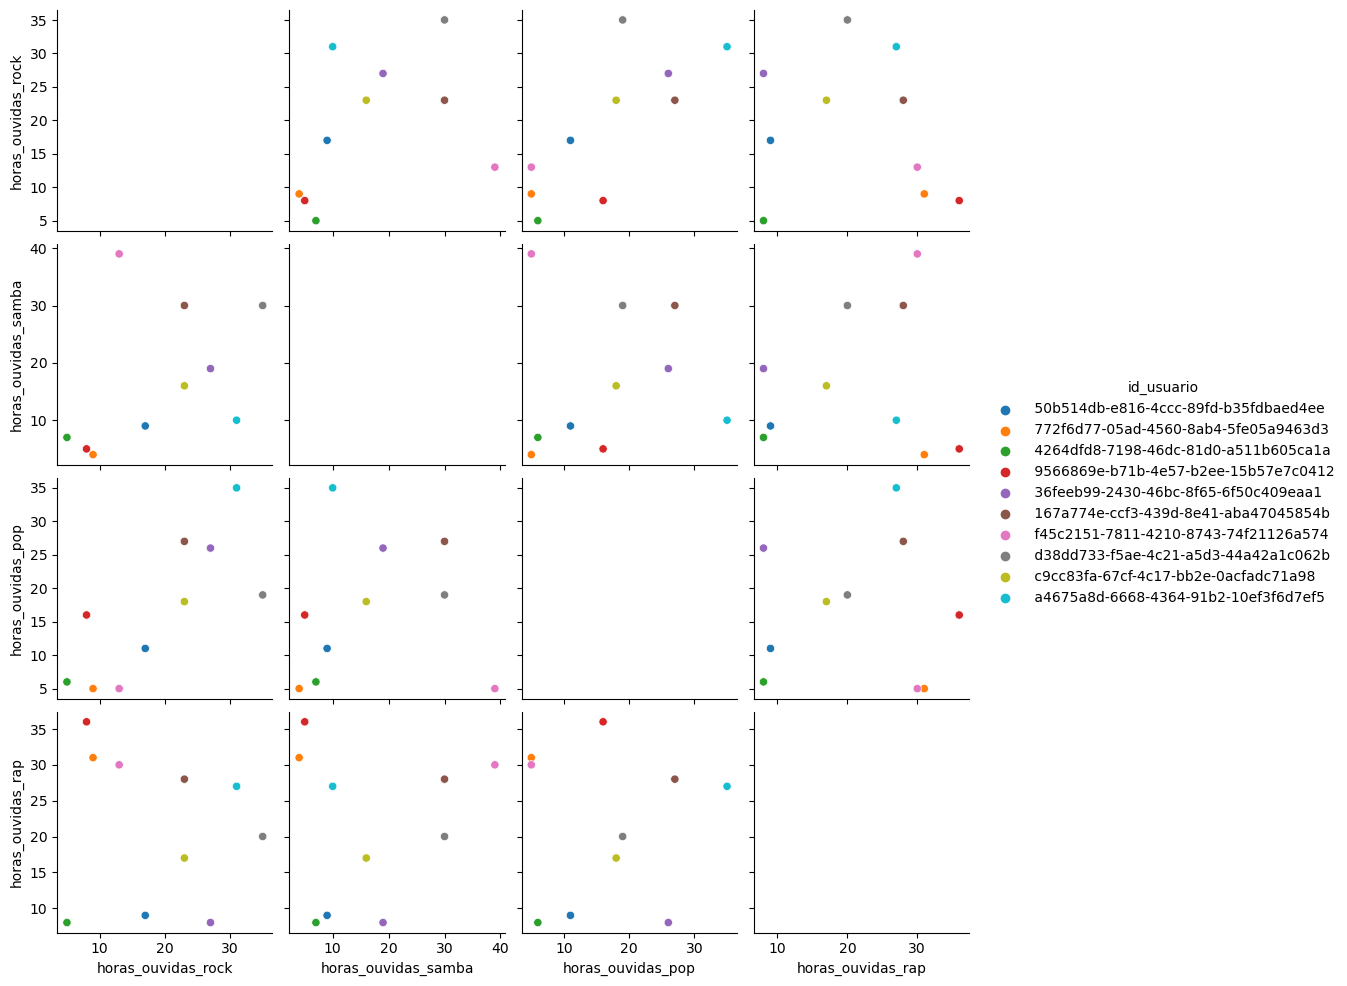

In [49]:
# pequena amostra para melhorar o desempenho/exibicao
sample = dataframe.sample(n=10, random_state=42)

# trata colunas para remover espacos entre os indicies, facilitando as analises dos dados
sample.columns = sample.columns.str.strip()

# exibicao grafica da amostra da base de dados
sample = sample.drop('index', axis=1, errors='ignore')

sb.pairplot(sample, hue="id_usuario")

### Exibicao da amostra, como forma tabelar

In [14]:
sample

,index,id_usuario,horas_ouvidas_rock,horas_ouvidas_samba,horas_ouvidas_pop,horas_ouvidas_rap
6252,6253,50b514db-e816-4ccc-89fd-b35fdbaed4ee,17,9,11,9
4684,4685,772f6d77-05ad-4560-8ab4-5fe05a9463d3,9,4,5,31
1731,1732,4264dfd8-7198-46dc-81d0-a511b605ca1a,5,7,6,8
4742,4743,9566869e-b71b-4e57-b2ee-15b57e7c0412,8,5,16,36
4521,4522,36feeb99-2430-46bc-8f65-6f50c409eaa1,27,19,26,8
6340,6341,167a774e-ccf3-439d-8e41-aba47045854b,23,30,27,28
576,577,f45c2151-7811-4210-8743-74f21126a574,13,39,5,30
5202,5203,d38dd733-f5ae-4c21-a5d3-44a42a1c062b,35,30,19,20
6363,6364,c9cc83fa-67cf-4c17-bb2e-0acfadc71a98,23,16,18,17
439,440,a4675a8d-6668-4364-91b2-10ef3f6d7ef5,31,10,35,27


### Separando as caracteristicas dos usuarios

In [66]:
dataframe.columns = dataframe.columns.str.strip()
X = np.array(dataframe.drop(['id_usuario', 'index'], axis=1))

### Visualizacao, numerica, das caracteristicas - para fins ilustrativos e para a melhor compreensao

In [67]:
X

array([[15,  3, 33, 22],
       [33, 36, 33, 35],
       [27, 31, 23, 17],
       ...,
       [13,  8, 35,  7],
       [33, 19,  4, 39],
       [15, 36, 36, 35]])

# Aplicacao, de fato, do K-Means

In [68]:
from sklearn.cluster import KMeans

In [69]:
kmeans = KMeans(n_clusters=4, random_state=0)

### Treinamento do kmeans

In [70]:
kmeans.fit(X)

/home/marcus/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

### Visualizacao dos grupos criados.

In [71]:
kmeans.labels_

array([0, 2, 3, ..., 3, 2, 2], dtype=int32)

### Realizando comparacoes e inserindo labels na amostra original

In [72]:
dataframe["kmeans"] = kmeans.labels_

In [73]:
dataframe

,index,id_usuario,horas_ouvidas_rock,horas_ouvidas_samba,horas_ouvidas_pop,horas_ouvidas_rap,kmeans
0,1,4309f87a-60a9-4748-a6a0-3667dd26a451,15,3,33,22,0
1,2,014904f1-4abd-433d-b249-59ad92ac9b17,33,36,33,35,2
2,3,11943164-2589-40f8-bd23-c7be3c8961d3,27,31,23,17,3
3,4,da647cf9-eeaa-4fb2-ba37-df3a82f2ec74,20,34,35,9,3
4,5,269abade-3fc7-4242-8ce0-70d293cec7b3,20,39,0,20,2
...,...,...,...,...,...,...,...
9995,9996,18a98e16-058a-4b21-8bc7-26de7a8207c9,34,5,7,37,0
9996,9997,0e1bdfc2-03af-4bba-899f-87bef5fc46b5,16,26,21,15,3
9997,9998,ab79e01b-ca59-44de-acf6-a0950613be9a,13,8,35,7,3
9998,9999,fae8dea6-107f-4fc2-84f8-d4883adcb14d,33,19,4,39,2


### Visualizando os resultados

/home/marcus/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


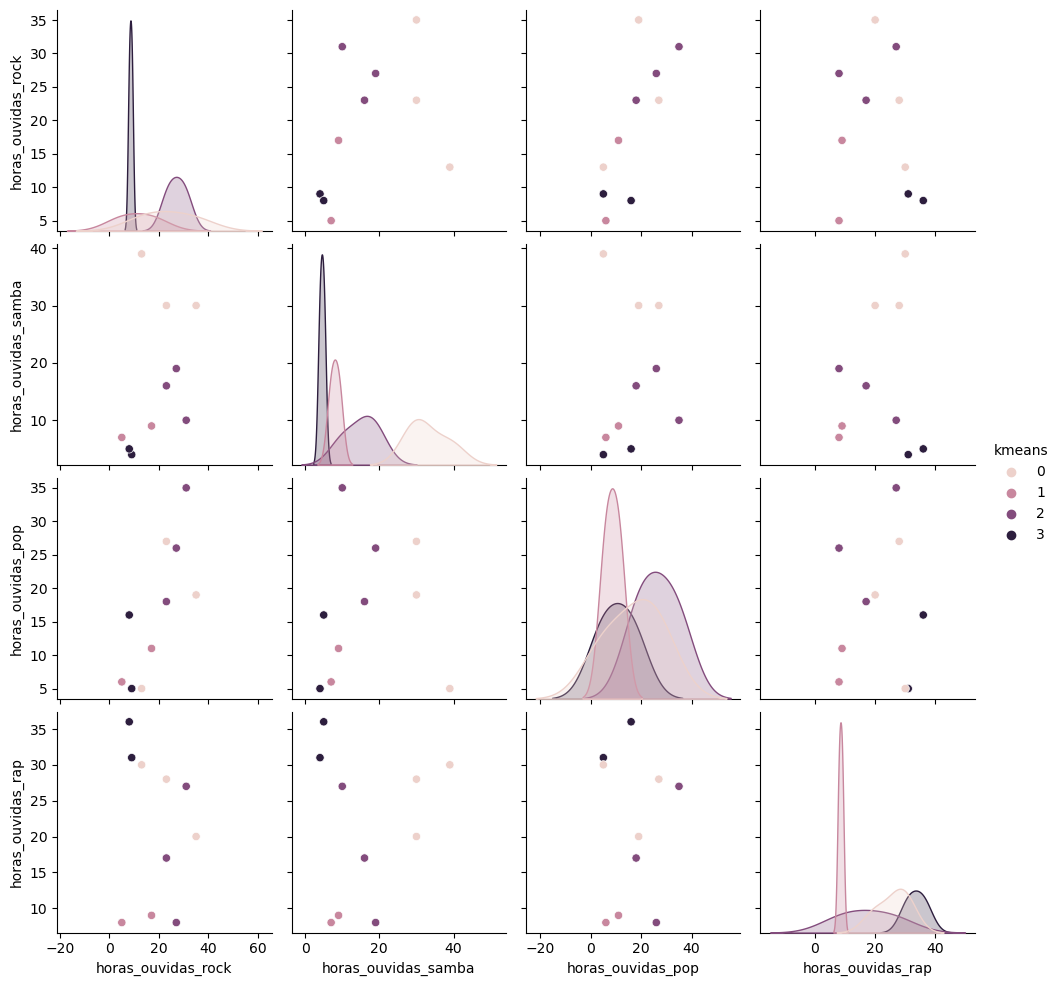

In [74]:
# remover a coluna index
dataframe = dataframe.drop('index', axis=1, errors='ignore')
# exibir o resultado do agrupamento
sb.pairplot(sample, hue='kmeans')

### Comparativo

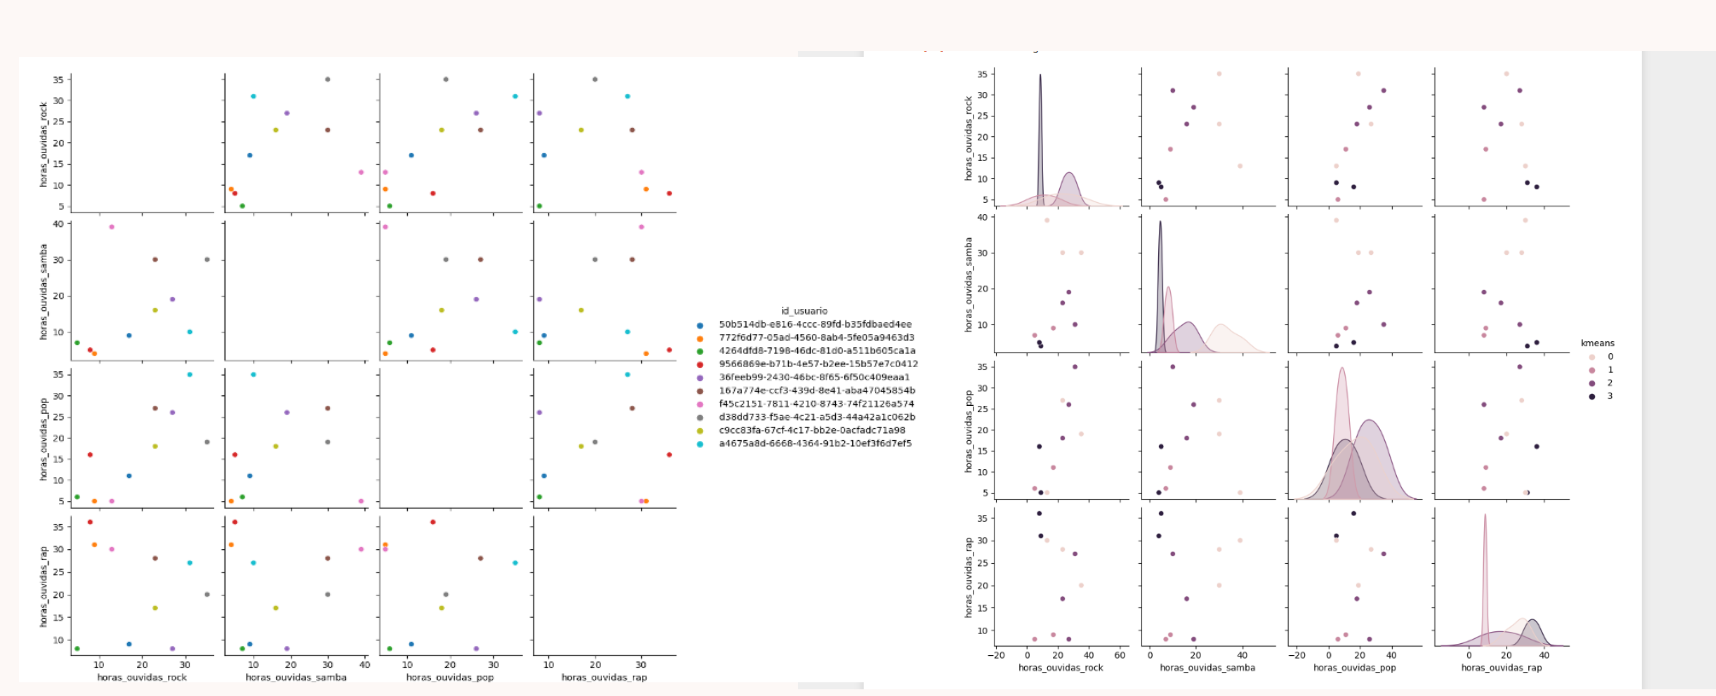